# COM761 Machine Learning Coursework 1
### 2021/22

**<font color=red>Deadline: 12:00 noon, Wednesday 27th October 2021</font>**

**<font color=red>This is an individual assignment: University regulations on plagiarism will apply.</font>**

**This piece of CW is worth 40\% of your overall mark for COM761.**
  
**The total number of marks available in this assignment is 40.**

**Enter your solutions directly into this Jupyter notebook.**

For each question, you should provide your answer **in the cell immediately below the question**.

If a question requires a **numerical answer**, your cell should include python code carrying out the relevant calculations, and include a `print` statement to make clear what your answer to the question is. 

If a question requires a **graphical plot**, your cell should include python code that results in the required plot being printed to screen.

**You need to submit BOTH of the following via Blackboard before the deadline:**
  1. **This Jupyter notebook (containing your solutions), AND**
  2. **A pdf of this Jupyter notebook (containing your solutions).**
  
 You can convert your Jupyter notebook to pdf by:
 - printing directly from your browser to pdf
 - if the above does not work in your browser, go to File-> Download As... -> HTML (.html). Then open the html file in Goggle chrome, and print from chrome to pdf.

## Data set for use in Q1 and Q2

At the Tokyo olympics, the decathlon took place over 4-5 August 2021.

The events on day one (4th August 2021) took place in this order:
- 100m
- long jump
- shot put
- high jump
- 400m

The events on day two (5th August 2021) took place in this order:
- 110m hurdles
- discus throw
- pole vault
- javelin throw
- 1500m

There are two data-files provided: 
1.	`decathlon_Tokyo.csv` contains the names of 19 athletes who completed the decathlon at the Tokyo olympics, along with their results in each event. The columns represent the events in the order they took place: 100m, long jump, shot put, high jump, 400m, 110m hurdles, discus throw, pole vault, javelin throw and 1500m.
2.	`decathlon_pb.csv` contains the the names of 19 athletes who completed the decathlon at the Tokyo olympics, along with their height (cm), weight (kg), age (months) and personal best (PB) performances in each event going into the Tokyo olympics.

In [1]:
#import main packages 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Question 1
#### Total marks for question: 20


(a) Create a single dataframe representing the two data-sets `decathlon_Tokyo.csv` and `decathlon_pb.csv`. Drop the `name` column from the single dataframe and display the first five rows. **[3 marks]**

In [2]:
## Enter code for (a) here

import pandas as pd

tokyo_df = pd.read_csv('decathlon_Tokyo.csv')   #event times dataframe for tokyo 2021 decathalon
pb_df = pd.read_csv('decathlon_pb.csv')    #athlete characteristics and personal bests dataframe 
combined_df = pd.merge(pb_df, tokyo_df, how='outer', on='Name')    #combine dataframes
combined_df = combined_df.drop(columns=['Name'])    #drop the name column

combined_df.head()    #display first 5 rows

,Height,Weight,Age,PB_100m,PB_LJ,PB_SP,PB_HJ,PB_400m,PB_110m_H,PB_DT,...,TOK_100m,TOK_LJ,TOK_SP,TOK_HJ,TOK_400m,TOK_110m_H,TOK_DT,TOK_PV,TOK_JT,TOK_1500m
0,184.0,83.0,381,10.12,8.28,15.34,2.09,46.54,13.27,50.26,...,10.12,8.24,14.80,2.02,47.48,13.46,48.67,4.9,63.44,271.1
1,185.0,82.0,353,10.50,7.80,17.08,2.09,48.26,13.54,52.38,...,10.68,7.50,15.07,2.08,50.31,13.90,48.08,5.2,73.09,283.2
2,NaN,NaN,256,10.36,7.72,14.60,2.11,45.82,14.09,45.11,...,10.34,7.64,14.49,2.11,46.29,14.08,44.38,5.0,57.12,279.2
3,191.0,95.0,338,10.53,7.56,16.20,2.08,49.04,13.88,48.17,...,10.67,7.30,15.59,1.99,48.25,14.03,45.46,5.1,69.10,275.5
4,204.0,88.0,306,10.30,7.80,14.58,2.09,47.35,14.05,50.28,...,10.43,7.65,15.31,1.99,46.92,14.39,47.14,5.0,57.24,271.8


(b) There are several missing values for weights and heights of athletes. Imput values for these into your dataframe, adding a brief comment explaining your method. *All of this data will be used as training data, so you do not need to worry about data leakage.* **[4 marks]**

In [3]:
## Enter code for (b) here

#check number of missing values for weight and height features 
print(combined_df.isna().sum()[:2])    #show number of missing values
combined_df[['Height','Weight']]    #show columns with missing values before imputation

Height    3
Weight    4
dtype: int64


,Height,Weight
0,184.0,83.0
1,185.0,82.0
2,NaN,NaN
3,191.0,95.0
4,204.0,88.0
5,191.0,NaN
6,185.0,82.0
7,191.0,82.0
8,178.0,75.0
9,NaN,NaN


In [4]:
##1b
#import sklearn imputation functions
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

data = combined_df.values    #convert pandas dataframe to numpy array 

#impute missing values based on available data 
imputer = IterativeImputer(estimator=BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
imputer.fit(data)
complete_data = imputer.transform(data)

complete_df = pd.DataFrame(complete_data,columns=combined_df.columns)    #convert back to pandas dataframe 

In [5]:
##1b
#check imputed values 
print(complete_df.isna().sum()[:2])    #show number of missing values
complete_df[['Height','Weight']]    #show columns that had missing values after imputation

Height    0
Weight    0
dtype: int64


,Height,Weight
0,184.000000,83.000000
1,185.000000,82.000000
2,194.583216,86.404683
3,191.000000,95.000000
4,204.000000,88.000000
5,191.000000,85.477121
6,185.000000,82.000000
7,191.000000,82.000000
8,178.000000,75.000000
9,191.361915,85.359493


In [6]:
##1b
'''
Method of imputation involved making use of sklearn IterativeImputer function. The missing feature is defined 
as a function of all other features then missing values are predicted using a Bayesian Ridge estimator. 

ref: https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/
'''

'\nMethod of imputation involved making use of sklearn IterativeImputer function. The missing feature is defined \nas a function of all other features then missing values are predicted using a Bayesian Ridge estimator. \n\nref: https://machinelearningmastery.com/iterative-imputation-for-missing-values-in-machine-learning/\n'

(c) One competitor (not in the data set), Thomas Van der Plaetsen, injured himself in the second event (the long jump) and had to withdraw from the remainder of the competition. His performance in the first event (the 100m) was 11.05 s [1]. 

Thomas is 186 cm tall, 81 kg and was 30 years and 7 months old at the time of the Tokyo Olympics.
His personal bests at the time of the Olympics were [2]:
- 100 metres – 11.04 s
- 400 metres – 48.64 s
- 1500 metres – 4 minutes 32.52 s
- 110 metres hurdles – 14.36 s
- High jump – 2.17 m
- Pole vault – 5.45 m
- Long jump – 7.90 m
- Shot put – 14.28 m
- Discus Throw – 48.81 m
- Javelin Throw – 65.31 m

Use sklearn to construct multiple linear regression models to predict how Thomas Van der Plaetsen would have performed in the remaining nine events at Tokyo, had he been able to compete. You should print your predictions for each event to screen. **[13 marks]**

[1] https://www.eurosport.com/athletics/tokyo-2020/2021/tokyo-2020-injury-sees-desperately-unfortunate-thomas-van-der-plaetsen-plummet-head-first-into-long-_sto8471315/story.shtml

[2] https://en.wikipedia.org/wiki/Thomas_Van_der_Plaetsen



In [7]:
## Enter code for (c) here

#split the data - high correlation between 'TOK_100m' and 'PB_100m' so can drop one as a feature 
X_training = complete_df.iloc[:,:13]    #features - consists of height, weight, age and all PBs
Y_training = complete_df.iloc[:,14:]    #target values - consists of event results for last 9 events 

#define test data
X_test = np.array([186.,81.,367.,11.04,7.90,14.28,2.17,48.64,14.36,48.81,5.45,65.31,272.52])[None,:]

#standardise the X data
X_test = pd.DataFrame(X_test,columns=X_training.columns)    #convert numpy array to pandas dataframe 
X_test_train = X_training.append(X_test, ignore_index=True)    #append X_test to X_training before scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_sc = scaler.fit_transform(X_test_train)    #scale data using sklearn package 

#split scaled feature data into test and train sets 
X_sc_test = X_sc[-1][None,:]
X_sc_train = X_sc[:-1]

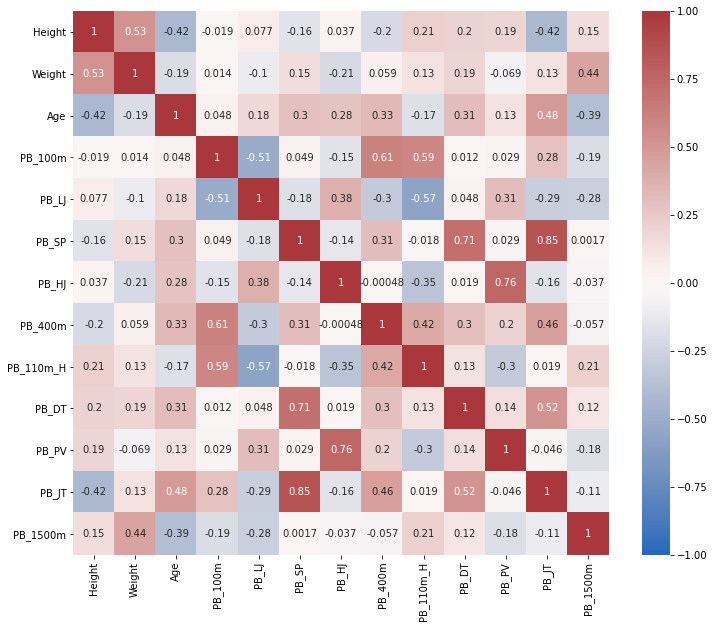

In [8]:
##1c

#check correlation between features 
plt.figure(figsize=(12,10))
cor = X_training.corr()
sns.heatmap(cor, cmap='vlag', vmin=-1., vmax=1., annot=True)
plt.show()

#standardising data has reduced multicollinearity.  There was high correlation between 'TOK_100m' and 'PB_100m'
# so 'TOK_100m' was dropped as a feature 

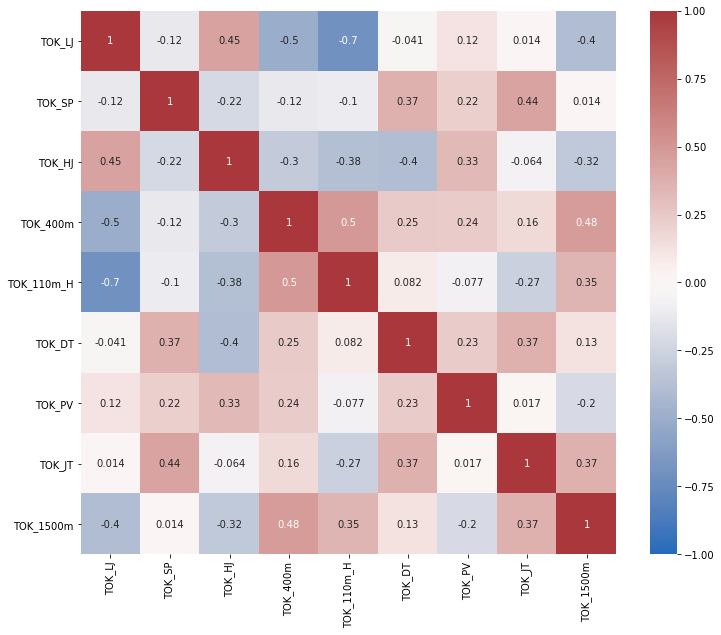

In [9]:
##1c

#check correlation between target values  
plt.figure(figsize=(12,10))
cor = Y_training.corr()
sns.heatmap(cor, cmap='vlag', vmin=-1., vmax=1., annot=True)
plt.show()

#target values are not highly correlated so do not need to use interative approach such as sklearn.ChainRegressor

In [10]:
##1c

from sklearn.linear_model import LinearRegression

#define function to predict performance for each event individually 
def olympic_model(X_test,X_train,y_train):
    
    model = LinearRegression()    #define model - linear model was best out of HuberRegressor, lasso, ridge
    model.fit(X_train,y_train)    #fit to data
    
    y_pred = model.predict(X_test)    #predict event performance 
    score = model.score(X_train,y_train)    #r2 score for prediction 
    
    return y_pred, score 


#initialise arrays for event performance and r2 scores 
event_pred = np.zeros(9)
r2_arr = np.zeros(9)

#predict performance for each event 
for i in range(9):
    y_train = Y_training.values[:,i]
    y_pred, score = olympic_model(X_sc_test,X_sc_train,y_train)
    
    event_pred[i] = y_pred
    r2_arr[i] = score 
    
print('Predicted event scores and coefficients of determination: \n')
print('Long Jump:    ', event_pred[0], 'm,    R^2:', r2_arr[0])
print('Shot Put:     ', event_pred[1], 'm,    R^2:', r2_arr[1])
print('High Jump:    ', event_pred[2], 'm,    R^2:', r2_arr[2])
print('400m:         ', event_pred[3], 's,    R^2:', r2_arr[3])
print('110m Hurdles: ', event_pred[4], 's,    R^2:', r2_arr[4])
print('Discus Throw: ', event_pred[5], 'm,    R^2:', r2_arr[5])
print('Pole Vault:   ', event_pred[6], 'm,    R^2:', r2_arr[6])
print('Javelin Throw:', event_pred[7], 'm,    R^2:', r2_arr[7])
print('1500m:        ', event_pred[8], 's,    R^2:', r2_arr[8],'\n')

print('mean R^2 score:',  np.mean(r2_arr))

Predicted event scores and coefficients of determination: 

Long Jump:     7.452795266270756 m,    R^2: 0.9210632924119575
Shot Put:      13.767085998808017 m,    R^2: 0.8427752692288768
High Jump:     1.9990846351301286 m,    R^2: 0.9200123428599485
400m:          49.63172695553737 s,    R^2: 0.9004663420939253
110m Hurdles:  14.665521217588354 s,    R^2: 0.8797860643109507
Discus Throw:  47.2817748335116 m,    R^2: 0.8862030305632944
Pole Vault:    5.11733670869094 m,    R^2: 0.7433338624232626
Javelin Throw: 59.22284892065527 m,    R^2: 0.8767997819851862
1500m:         284.283433933583 s,    R^2: 0.7546895581498099 

mean R^2 score: 0.8583477271141347


# Question 2
#### Total marks for question: 10

The optimal coefficients for a least squares linear regression model $f(\mathbf{x}) = \mathbf{w}^T\mathbf{x}$ can be derived analytically, by differentiating the mean squares cost function with respect to the weight and setting the derivative equal to zero [3].

Doing this, the vector $\hat{\mathbf{w}}$ of weights that minimizes the mean squares cost function is given by the *normal equation*:

\begin{equation}\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y}\end{equation}

where $\mathbf{X} = \begin{bmatrix} \mathbf{x}_1^T \\ \mathbf{x}_2^T \\ \vdots \\ \mathbf{x}_N^T  \end{bmatrix} = \begin{bmatrix} 1 & x_1^{(1)} & x_2^{(1)} & \ldots & x_n^{(1)} \\ 1 & x_1^{(2)} & x_2^{(2)} & \ldots & x_n^{(2)} \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 1 & x_1^{(N)} & x_2^{(N)} & \ldots & x_n^{(N)}   \end{bmatrix}$

where $x_{i}^{(j)}$ is the $i$-th feature of example $j$.

Choose one of your multiple linear regression models from Q1 (c), and print out the value of its weights.

Then set up the appropriate matrices $\mathbf{X}$ and $\mathbf{y}$, and write your own code to calculate the optimal weight vector $\hat{\mathbf{w}}$ using the normal equation. Print the value of $\hat{\mathbf{w}}$ to screen, and compare to the weights for the corresponding sklearn model. **[10 marks]**

[3] pp. 9-14, 22-27 of *A First Course in Machine Learning*, 2nd Edition.

In [11]:
## Enter code for Q2 here

#choose model for long jump 
y = Y_training.values[:,0]

model = LinearRegression()    
model.fit(X_sc_train,y)
weigths = model.coef_    #feature touching weights for 1c model 
bias = model.intercept_   #bias (w_0)

W_numerical = np.array([bias])
W_numerical = np.append(W_numerical, weigths)    #weight vector for model from 1c for long jump

print('W_numerical:    ', W_numerical[:,None], '\n')


#define X matrix for normal equation. y vector as before  
X = np.ones((19,1))
X = np.hstack((X,X_sc_train))

#calculate weight vector using normal equation
XT_X = np.matmul(X.T, X)
XT_X_inv = np.linalg.inv(XT_X)
M = np.matmul(XT_X_inv, X.T)
W_analytical = np.matmul(M,y)

print('W_analytical:    ', W_analytical[:,None], '\n')


#define delta vector as delta = W_analytical - W_numerical
delta = W_analytical - W_numerical
delta_mag = np.linalg.norm(delta)

print('delta vector:    ', delta)
print('delta vector magnitude:    ', delta_mag)

'''can see there is a very small difference between the weight vectors calculated numerically and that from the
normal equation. This suggests the model in 1c is reasonably accurate ''' 

W_numerical:     [[ 7.37563976e+00]
 [ 7.49934302e-02]
 [-6.22060455e-02]
 [ 3.76859184e-02]
 [-7.39884250e-02]
 [ 1.46773297e-01]
 [-1.51577353e-02]
 [ 5.00082568e-02]
 [-7.07260743e-02]
 [-3.80451634e-02]
 [-3.69319231e-02]
 [-2.62973530e-02]
 [ 7.61653574e-02]
 [ 4.53311275e-03]] 

W_analytical:     [[ 7.37563976e+00]
 [ 7.49934302e-02]
 [-6.22060455e-02]
 [ 3.76859184e-02]
 [-7.39884250e-02]
 [ 1.46773297e-01]
 [-1.51577353e-02]
 [ 5.00082568e-02]
 [-7.07260743e-02]
 [-3.80451634e-02]
 [-3.69319231e-02]
 [-2.62973530e-02]
 [ 7.61653574e-02]
 [ 4.53311275e-03]] 

delta vector:     [-2.66453526e-15  5.05151476e-15 -2.05391260e-15  2.04003481e-15
  1.38777878e-17  1.60982339e-15 -5.64999436e-15 -1.38083989e-15
  3.46944695e-16  4.71844785e-16 -2.96984659e-15  1.28716482e-15
  2.52575738e-15  2.32452946e-15]
delta vector magnitude:     1.0001070203877194e-14


'can see there is a very small difference between the weight vectors calculated numerically and that from the\nnormal equation. This suggests the model in 1c is reasonably accurate '

# Question 3
#### Total marks for question: 10

In this question, you will use the `random_search` algorithm introduced in the lectures. The code is already provided in the cell below.

**(a)** Write a function called `himmelblau` that implements the *Himmelblau function*:

\begin{equation}
g(x_1,x_2) = (x_1^2 + x_2 - 11)^2 +(x_1 + x_2^2 - 7)^2
\end{equation}

This function should take in a numpy column vector representing $\mathbf{x} = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$ and return the value of $g(x_1,x_2)$. **[2 marks]**

**(b)** Amend the `random_search` function to implement another option for `alpha_choice` called `decay`.  In this setting, alpha should be set to $\alpha = e^{-k/10}$, where $e = 2.718281828\ldots$ is the natural base. **[2 marks]**

**(c)** Perform an experiment to investigate the effect of `alpha_choice` when optimizing the Himmelblau function with the following settings:
- Number of steps $K=50$
- Number of random directions at each step $P=1000$  
- Initial point $\mathbf{w}^0 = \begin{bmatrix} -2 \\ -2 \end{bmatrix}$

You should investigate three settings for $\alpha$: fixed steplength of $\alpha = 1$, 'diminishing' and 'decay'.

Show the results from your experiments by plotting (on the same figure) the cost history (i.e. history of objective function values) against iteration number for the three settings of the random search. Any differences in the performance of the three settings should be clear from the figure. **[4 marks]**

**(d)** Comment on the worst performing setting of the random search in **(c)**, giving an explanation of why it does not perform as well as the other two settings. **[2 marks]**




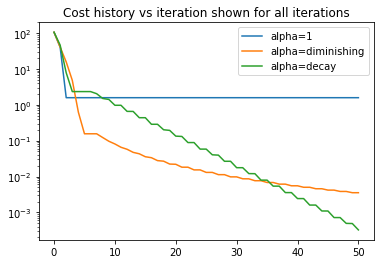

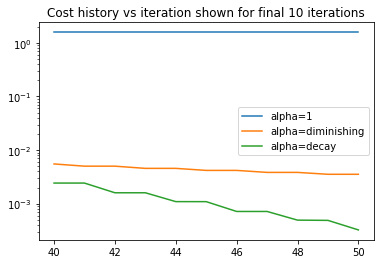

' alpha = 1.0 is the worst performing setting. This is because the direction vectors are too large so it \noscillates about minimum without hitting it.'

In [13]:
## Enter code for part (a) below [2 marks]
import matplotlib.pyplot as plt

def himmelblau(x_vector):
    
    x1, x2 = x_vector[0], x_vector[1]    # define vector elements 
    g = (x1**2. + x2 - 11.)**2. + (x1 + x2**2. - 7. )**2.
    
    return g

# random search function - ammend for part (b) [2 marks]
def random_search(g,alpha_choice,max_its,w,num_samples):
    # run random search
    weight_history = []         # container for weight history
    cost_history = []           # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):        
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        elif alpha_choice == 'decay':    #3b - added functionality 
            alpha = np.exp(-k/10.)
        else:
            alpha = alpha_choice
            
        # record weights and cost evaluation
        weight_history.append(w.T)
        cost_history.append(g(w.T))
        
        # construct set of random unit directions
        directions = np.random.randn(num_samples,np.size(w))
        norms = np.sqrt(np.sum(directions*directions,axis = 1))[:,np.newaxis]
        directions = directions/norms   
        
        ### pick best descent direction
        # compute all new candidate points
        w_candidates = w + alpha*directions
        
        # evaluate all candidates
        evals = np.array([g(w_val.T) for w_val in w_candidates])

        # if we find a real descent direction take the step in its direction
        ind = np.argmin(evals)
        if g(w_candidates[ind]) < g(w.T):
            # pluck out best descent direction
            d = directions[ind,:]
        
            # take step
            w = w + alpha*d
        
    # record weights and cost evaluation
    weight_history.append(w.T)
    cost_history.append(g(w.T))
    return weight_history,cost_history

w_init = np.array([[-2,-2]])

# Enter code for part (c) below [4 marks]

#define K and P
max_its = 50 
num_samples = 1000

#define vector for x-axis
iteration = np.arange(0,max_its+1)

#calculate cost history for each situation 
alpha_choice1 = 1.
alpha_choice2 = 'diminishing'
alpha_choice3 = 'decay'

w_his1, c_his1 = random_search(himmelblau,alpha_choice1,max_its,w_init,num_samples)
w_his2, c_his2 = random_search(himmelblau,alpha_choice2,max_its,w_init,num_samples)
w_his3, c_his3 = random_search(himmelblau,alpha_choice3,max_its,w_init,num_samples)

#plot results 
plt.plot(iteration,c_his1,label='alpha=1')
plt.plot(iteration,c_his2,label='alpha=diminishing')
plt.plot(iteration,c_his3,label='alpha=decay')
plt.yscale('log')
plt.title('Cost history vs iteration shown for all iterations')
plt.legend()
plt.show()

plt.plot(iteration[40:],c_his1[40:],label='alpha=1')
plt.plot(iteration[40:],c_his2[40:],label='alpha=diminishing')
plt.plot(iteration[40:],c_his3[40:],label='alpha=decay')
plt.yscale('log')
plt.title('Cost history vs iteration shown for final 10 iterations')
plt.legend()
plt.show()


#Enter comment below for part (d); or alternatievly type your answer into a new markdown cell [2 marks]
''' alpha = 1.0 is the worst performing setting. This is because the direction vectors are too large so it 
oscillates about minimum without hitting it.'''